In [14]:
import pickle
from Sample import Sample
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

import math

import seaborn as sns
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import pandas as pd
# %matplotlib inline


# Pickle functions
def pickle_sample(self, path):
    sample_pickle = open(f"{path}/{f.get_param('ID')}_pickle.pickle", "wb")
    pickle.dump(self, sample_pickle)
    sample_pickle.close()

def unpickle_sample(path):
    sample_pickle =open(path, "rb")
    self = pickle.load(sample_pickle)
    sample_pickle.close()
    return self


def df2arr(df):
    # convert Series or DataFrame into numpy array
    return np.array(df.tolist())

In [17]:

#f: Sample = unpickle_sample("tests/f3/20220426_RM0008_130hpf_fP1_f3_pickle.pickle")
f: Sample= unpickle_sample("tests/f2/20220511_RM0008_126hpf_fP10_f2_pickle.pickle")
print(f)
f.neuron.head()
f.neuron.info()

20220511_RM0008_126hpf_fP10_f2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   raw_traces        1088 non-null   object
 1   roi_exp_tag       1088 non-null   int64 
 2   roi_exp_position  1088 non-null   object
 3   roi_exp_plane     1088 non-null   int64 
 4   dig_err           1088 non-null   object
 5   df_traces         1088 non-null   object
 6   baseline_mean     1088 non-null   object
 7   baseline_std      1088 non-null   object
 8   threshold         1088 non-null   object
dtypes: int64(2), object(7)
memory usage: 76.6+ KB


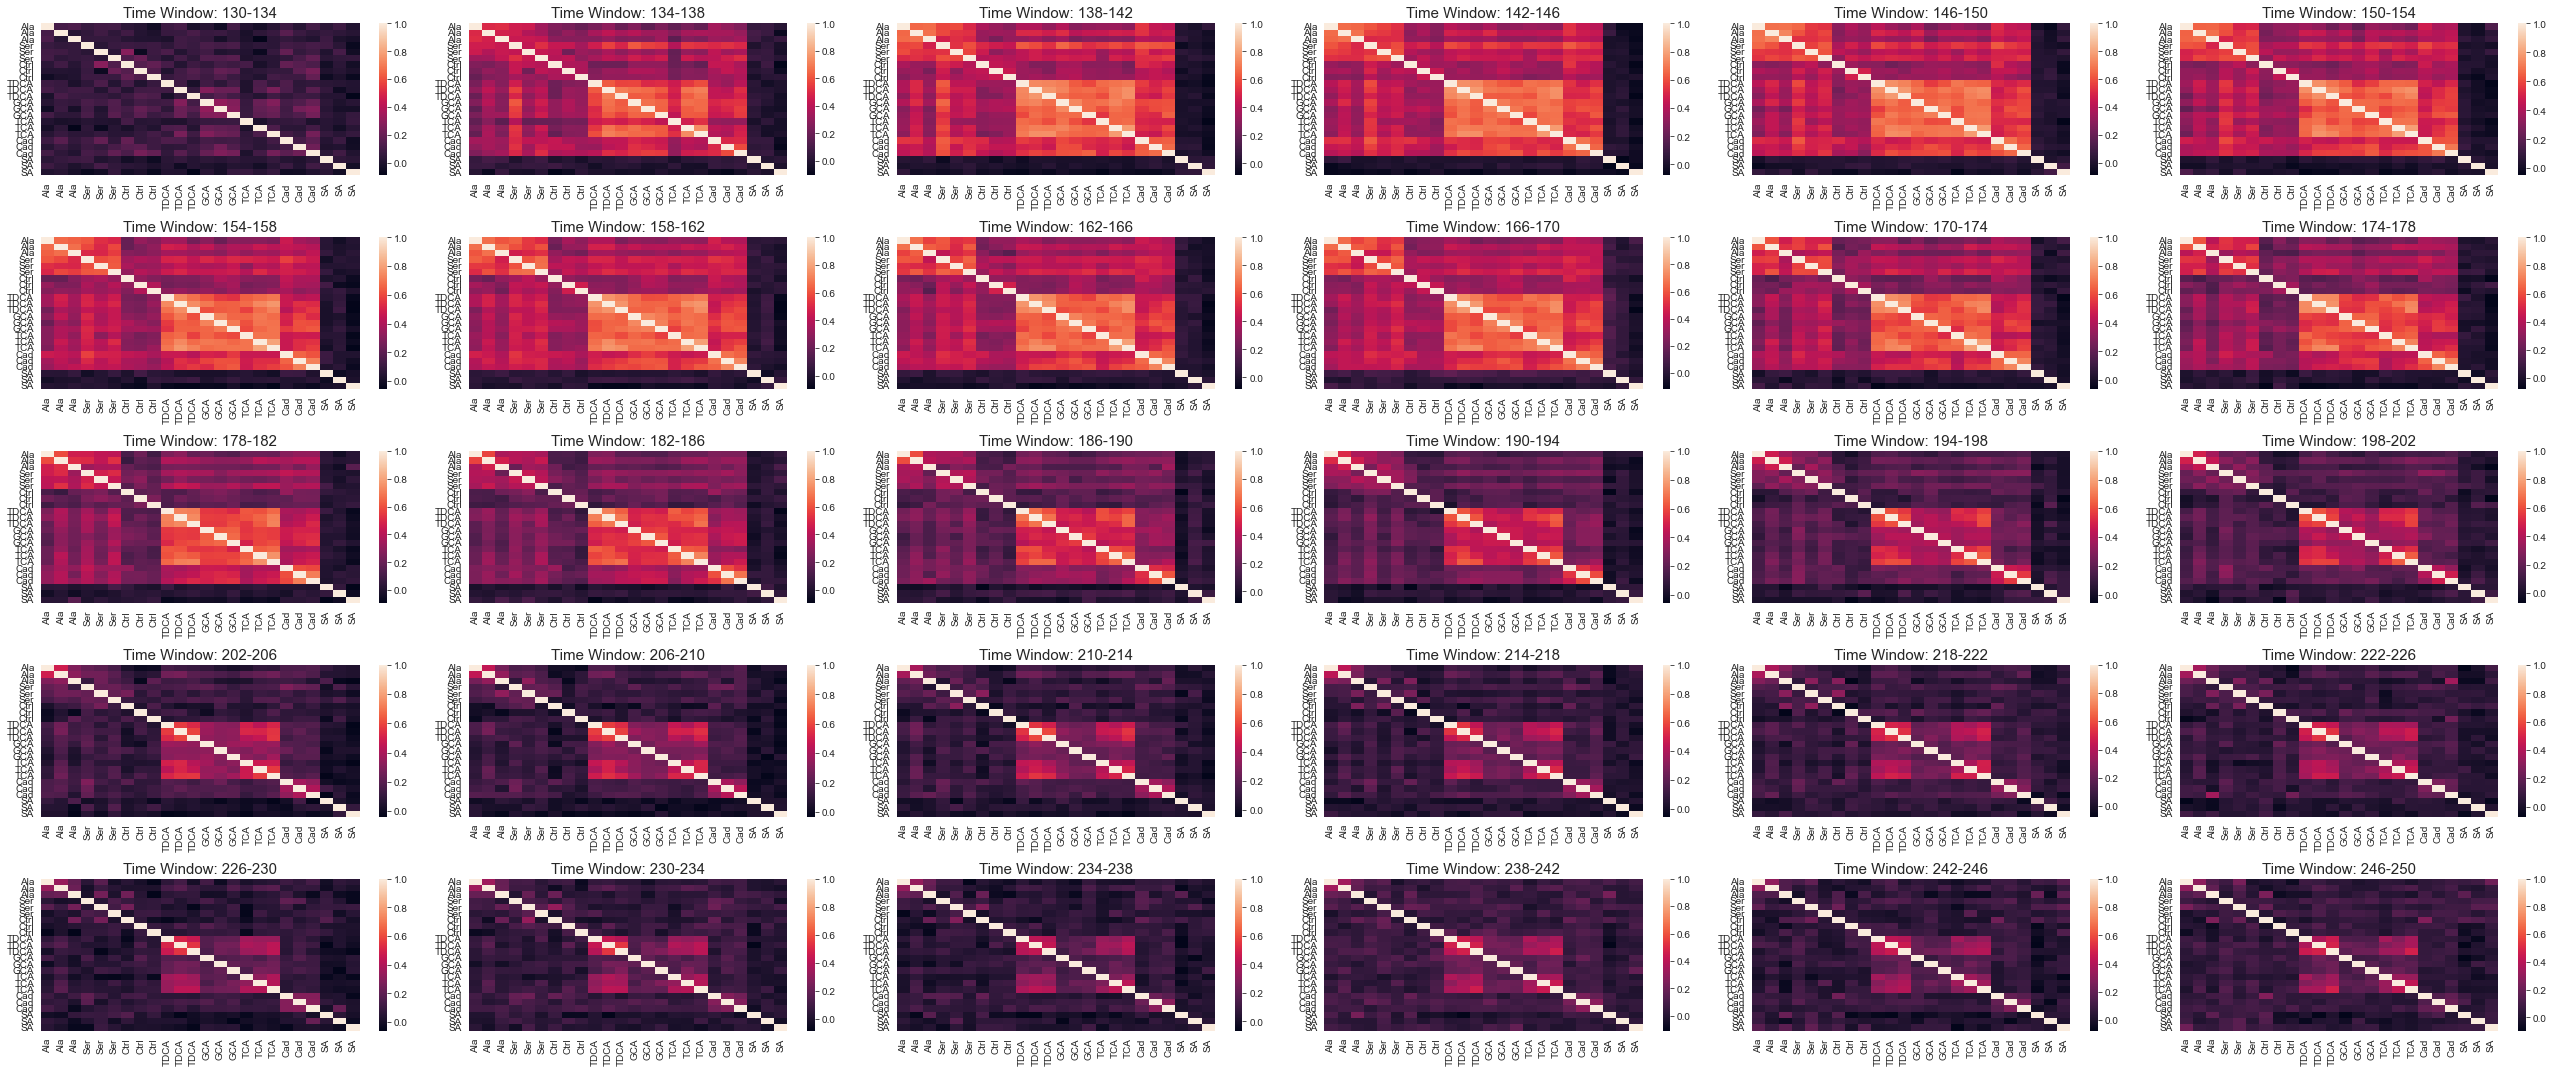

In [18]:
window = 4 #frames
time_start = 130 #frames
#order by trial: Ala, Ala, Ala, Ser, Ser, Ser, etc....
order_by_trial = list((np.array([x for x in range(24)]).reshape([3, 8]).transpose().flatten()))

reordered_odor_names = [f.get_odor_name(od) for od in order_by_trial]

num_windows = len(range(130, 250, 4))
num_rows = 5  # Set the number of rows to 3

# Calculate the number of columns needed
num_cols = (num_windows - 1) // num_rows + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6 * num_cols, 3 * num_rows))

# Iterate over different time windows
for i, time_start in enumerate(range(130, 250, 4)):
    traces_on_window = f.get_traces(time_window=[time_start, time_start + window], trace="df").mean(axis=1).squeeze()[:, order_by_trial]
    df_traces_on_window = pd.DataFrame(traces_on_window)

    corr_matrix = df_traces_on_window.corr()

    # Plot the heatmap on the corresponding subplot
    row = i // num_cols  # Determine the row index
    col = i % num_cols  # Determine the column index

    sns.heatmap(corr_matrix, ax=axes[row, col], xticklabels=reordered_odor_names, yticklabels=reordered_odor_names)
    axes[row, col].set_title(f"Time Window: {time_start}-{time_start+window}")

# Remove empty subplots if present
if num_windows < num_rows * num_cols:
    for j in range(num_windows, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()
